ME200, Johannes Ruf and Luitgard Veraart

# Solutions to Assignment 11

## Exercise 42: (Black-Scholes option pricing formula - European put option)

Let $X \sim \textrm{N}(0, 1)$. Then, 

\begin{align*}
\textrm{E}\left[ e^{-rT} (K-S_T)^+ \right] &= 
\textrm{E}\left[ e^{-rT}(K-S_0 \exp \left( (r - \frac{\sigma^2}{2})T + \sigma \sqrt{T} X \right))^+\right]\\
&= \int_{-\infty}^{+\infty} e^{-rT} (K - S_0 \exp\left( (r - \frac{\sigma^2}{2})T + \sigma \sqrt{T} x\right))^+ \frac{1}{\sqrt{2 \pi}} \exp\left(-\frac{x^2}{2}\right) dx=(*). 
\end{align*}
Now observe that 
\begin{align*}
K \geq S_0 \exp\left(   (r - \frac{\sigma^2}{2})T + \sigma \sqrt{T} x\right) 
\Longleftrightarrow
x \leq - \frac{\log \left(\frac{S_0}{K} \right) + \left(r - \frac{\sigma^2}{2}\right)T}{\sigma \sqrt{T}}=-(D_1 - \sigma \sqrt{T})=-D_1 + \sigma \sqrt{T}. 
\end{align*}
Hence, 
\begin{align*}
(*)&= \int_{-\infty}^{-D_1+ \sigma \sqrt{T}} e^{-rT} (K-S_0 \exp\left( (r - \frac{\sigma^2}{2})T + \sigma \sqrt{T} x\right)) \frac{1}{\sqrt{2 \pi}} \exp\left(-\frac{x^2}{2}\right) dx\\
&=
e^{-rT} K \int_{-\infty}^{-D_1+ \sigma \sqrt{T}}  \frac{1}{\sqrt{2 \pi}} \exp\left(-\frac{x^2}{2}\right) dx - 
e^{-rT} S_0 \int_{-\infty}^{-D_1+ \sigma \sqrt{T}}  \exp\left( (r - \frac{\sigma^2}{2})T + \sigma \sqrt{T} x\right) \frac{1}{\sqrt{2 \pi}} \exp\left(-\frac{x^2}{2}\right) dx. 
\end{align*}

We now look at the two integrals separately. We start with the first one: 
\begin{align*}
\int_{-\infty}^{-D_1+ \sigma \sqrt{T}} \frac{1}{\sqrt{2 \pi}} \exp\left(-\frac{x^2}{2}\right) dx
=\Phi(-D_1 + \sigma \sqrt{T}). 
\end{align*}

Next we evaluate the second integral:  
\begin{align*}
&\int_{-\infty}^{-D_1+ \sigma \sqrt{T}}  \exp\left( (r - \frac{\sigma^2}{2})T + \sigma \sqrt{T} x\right) \frac{1}{\sqrt{2 \pi}} \exp\left(-\frac{x^2}{2}\right) dx\\
&= \exp\left( (r - \frac{\sigma^2}{2})T \right)
\int_{-\infty}^{-D_1+ \sigma \sqrt{T}}  \frac{1}{\sqrt{2 \pi}} \exp\left( -\frac{1}{2} \left( x^2 -2\sigma \sqrt{T} x + \sigma^2 T - \sigma^2 T \right) \right) dx\\
&=\exp\left( (r - \frac{\sigma^2}{2})T  + \frac{\sigma^2T}{2}\right)
\int_{-\infty}^{-D_1+ \sigma \sqrt{T}} \frac{1}{\sqrt{2 \pi}} \exp\left( -\frac{1}{2} \left( x -\sigma \sqrt{T}) \right)^2 \right)dx\\
&=e^{rT} \Phi(-D_1+\sigma \sqrt{T}-\sigma \sqrt{T})\\
&=e^{rT} \Phi(-D_1). 
\end{align*}

Combining these results, gives
\begin{align*}
\textrm{E}\left[ e^{-rT} (K-S_T)^+ \right]
=  K e^{-rT} \Phi(-D_1 +\sigma \sqrt{T}) - S_0 \Phi(-D_1). 
\end{align*}

## Exercise 43: (Variance reduction techniques for option pricing)

1. A Monte Carlo estimator for the European put option with maturity $T$ and strike $K$ is given by

\begin{align*}
V^{\textrm{MC}}_0(n) = \frac{1}{n} \sum_{i=1}^n e^{-rT} \left(K - S_0 \exp\left( (r - \frac{\sigma^2}{2}) T + \sigma \sqrt{T} X_i \right) \right)^+, 
\end{align*}
where $X_1, \ldots, X_n$ are i.i.d. from the $\mathcal{N}(0, 1)$ distribution. 

2. Since for $X \sim \mathcal{N}(0, 1)$, $(X, -X)$ is an antithetic pair, an antithetic variates estimator for the time-0 price of a European put option is given by
\begin{align*}
V^{\textrm{MC}}_0(n) &= \frac{1}{2n} \sum_{i=1}^n e^{-rT} \left(K - S_0 \exp\left( (r - \frac{\sigma^2}{2}) T + \sigma \sqrt{T} X_i \right) \right)^+\\
& \quad 
+\frac{1}{2n} \sum_{i=1}^n e^{-rT} \left(K - S_0 \exp\left( (r - \frac{\sigma^2}{2}) T + \sigma \sqrt{T} (-X_i) \right) \right)^+
, 
\end{align*}
where $X_1, \ldots, X_n$ are i.i.d. from the $\mathcal{N}(0, 1)$ distribution. 


3. Let $X_i$ be i.i.d. random variables from the standard normal distribution and let 
$S_i(T)=S_0 \exp\left( (r - \frac{\sigma^2}{2}) T + \sigma \sqrt{T} X_i \right)$ and $Y_i = e^{-rT} (K - S_i)^+$. Then a control variate estimator for the time-0 price of a European put option is given by
\begin{align*}
\overline{Y}_n(b) = \frac{1}{n} \sum_{i=1}^n (Y_i - b(e^{-r T}S_i(T) - S(0))),  
\end{align*}
where $b$ would often be chosen to be $\hat{b}_n^*$ as defined in the lecture notes. 


We will implement the different estimators in Python next. 

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm

rng = np.random.default_rng(2468)

### Analytical formula and standard Monte Carlo estimator for the European put price

First, we implement the analytical formula for the time-$0$ price of the European put in the Black-Scholes model and a classical Monte Carlo estimator. 

In [2]:
def black_scholes_put(S0, K, r, T, sigma):
    d1 = (np.log(S0 / K) + (r + 0.5 * sigma**2) * T)/(sigma * np.sqrt(T))
    d2 = d1 - sigma * np.sqrt(T)
    tmp1 = S0 * norm.cdf(-d1, loc=0, scale=1)
    tmp2 = K * np.exp(-r * T) * norm.cdf(-d2, loc=0, scale=1)
    price = tmp2 - tmp1
    return price

def terminal_stockprice(rng, S0, T, r, sigma, samplesize):
    mystandardnormalsample = rng.standard_normal(size=samplesize)
    tmp1 = (r - 0.5*(sigma ** 2)) * T
    tmp2 = sigma * np.sqrt(T) * mystandardnormalsample
    stockprice = S0 * np.exp(tmp1 + tmp2)
    return stockprice

def bs_put_mc(rng, S0, K, T, r, sigma, samplesize, myepsilon):
    # Generate terminal stock prices.
    mystockprice = terminal_stockprice(rng, S0, T, r, sigma, samplesize)
    # Compute payoffs.
    payoffs = np.maximum(K - mystockprice, 0)
    # Discount payoffs
    discountedpayoffs = np.exp(- r * T)*payoffs
    # Compute MC price
    price = np.mean(discountedpayoffs)
    # Compute confidence interval next
    standarddev_rv = np.std(discountedpayoffs, ddof=1)
    standarddev_mcest = standarddev_rv / np.sqrt(samplesize)
    aepsilon = norm.ppf(1.0 - myepsilon * 0.5)
    # Left boundary of CI
    ci_left = price - aepsilon * standarddev_mcest
    # Right boundary of CI
    ci_right = price + aepsilon * standarddev_mcest
    return price, standarddev_mcest, ci_left, ci_right

In [3]:
# Defining some model parameters
S0 = 50.0
K = 50.0
T = 0.25
r = 0.05
sigma = 0.3
halfsamplesize = 100000
samplesize = 2 * halfsamplesize
myepsilon = 0.05

In [4]:
print('----------------')
print('The analytical option price of the put is {:.4f}'.format(black_scholes_put(S0, K, r, T, sigma)))
print('-----------------')
MCresults = bs_put_mc(rng, S0, K, T, r, sigma, samplesize, myepsilon)
print('MC put price: {:.4f} and stdev of MC est: {:.4f}'.format(MCresults[0],MCresults[1]))
print('CI based on MC is ("{:.4f}, {:.4f})'.format(MCresults[2], MCresults[3]))


----------------
The analytical option price of the put is 2.6704
-----------------
MC put price: 2.6776 and stdev of MC est: 0.0085
CI based on MC is ("2.6610, 2.6943)


### Antithetic variates estimator for the European put price

Second, we implement an antithetic variates estimator for the time-$0$ price of the European put. 

In [5]:
def terminal_stockprice_av(rng, S0, T, r, sigma, halfsamplesize):
    """Function computes terminal stock prices based on antithetic pairs. """
    mynormals1 = rng.standard_normal(halfsamplesize)
    mynormals2 = - mynormals1
    tmp1 = (r - 0.5*sigma ** 2) * T
    tmp2 = sigma * np.sqrt(T) * mynormals1
    tmp3 = sigma * np.sqrt(T) * mynormals2
    stockprice1 = S0 * np.exp(tmp1 + tmp2)
    stockprice2 = S0 * np.exp(tmp1 + tmp3)
    allstockprices = np.concatenate((stockprice1, stockprice2))
    return stockprice1, stockprice2, allstockprices


def bs_put_av(rng, S0, K, T, r, sigma, halfsamplesize, myepsilon):
    """ Antithethic variate estimation for European call price in BS model."""
    # Note that 2*halfsamplesize random variables will be used in the AV estimator.
    # Generate terminal stock prices.
    mystockprices = terminal_stockprice_av(rng, S0, T, r, sigma, halfsamplesize)
    # Compute payoffs.
    payoffs1 = np.maximum(K - mystockprices[0], 0)
    payoffs2 = np.maximum(K - mystockprices[1], 0)
    # Discount payoffs
    discpayoffs1 = np.exp(- r * T)*payoffs1
    discpayoffs2 = np.exp(- r * T)*payoffs2
    thecov = np.cov(discpayoffs1, discpayoffs2, ddof=1)[0, 1]
    possiblereduction = thecov / (2 * halfsamplesize)
    discpayoffs = np.concatenate((discpayoffs1, discpayoffs2))
    price = np.mean(discpayoffs)
    standarddev_rv = np.std(discpayoffs, ddof=1)
    standarddev_avest = standarddev_rv / np.sqrt(2 * halfsamplesize)
    aepsilon = norm.ppf(1.0 - myepsilon * 0.5)
    ci_left = price - aepsilon * standarddev_avest
    ci_right = price + aepsilon * standarddev_avest
    return price, standarddev_avest, ci_left, ci_right, possiblereduction

print('----------------')
AVresults = bs_put_av(rng, S0, K, T, r, sigma, halfsamplesize, myepsilon)
print('AV price: {:.4f} and stdev of AV est: {:.4f}'.format(AVresults[0], AVresults[1]))
print('CI based on AV is ({:.4f}, {:.4f})'.format(AVresults[2], AVresults[3]))
print('Note that sample covariance/(2n) is {:.8f}'.format(AVresults[4]))

----------------
AV price: 2.6594 and stdev of AV est: 0.0085
CI based on AV is (2.6428, 2.6760)
Note that sample covariance/(2n) is -0.00003536


### Control variates estimator for the European put price 

Third, we implement a control variate estimator for the time-$0$ price of the European put in the Black-Scholes model. 

In [6]:
def bs_put_cv(rng, S0, K, T, r, sigma, samplesize, myepsilon):
    """ Control variate estimation for European put price in BS model."""
    # Generate terminal stock prices.
    mystockprice = terminal_stockprice(rng, S0, T, r, sigma, samplesize)
    # Compute payoffs.
    payoffs = np.maximum(K - mystockprice, 0)
    # Discount payoffs
    discountedpayoffs = np.exp(- r * T)*payoffs
    # Use discounted stock as control
    xs = np.exp(- r * T) * mystockprice
    # Compute sample version of b*
    bstar = np.cov(xs, discountedpayoffs, ddof=1)[0, 1] / np.var(xs, ddof=1)
    # print("In cv bstar=", bstar)
    # Define z= Y(bstar)
    z = discountedpayoffs - bstar * (xs - S0)
    # Compute MC price
    price = np.mean(z)
    # Compute confidence interval next
    standarddev_rv = np.std(z, ddof=1)
    standarddev_cvest = standarddev_rv / np.sqrt(samplesize)
    aepsilon = norm.ppf(1.0 - myepsilon * 0.5)
    # Left boundary of CI
    ci_left = price - aepsilon * standarddev_cvest
    # Right boundary of CI
    ci_right = price + aepsilon * standarddev_cvest
    # Compute the sqared correation rhosquared
    tmpcov = np.cov(xs, discountedpayoffs, ddof=1)[0, 1]
    tmpvarx = np.var(xs, ddof=1)
    tmpvary = np.var(discountedpayoffs, ddof=1)
    rhosquared = (tmpcov ** 2) / (tmpvarx * tmpvary)
    return price, standarddev_cvest, ci_left, ci_right, rhosquared

print('----------------')
CVresults = bs_put_cv(rng, S0, K, T, r, sigma, samplesize, myepsilon)
print('CV price: {:.4f} and stdev of CV est: {:.4f}'.format(CVresults[0], CVresults[1]))
print('CI based on CV is ("{:.4f}, {:.4f})'.format(CVresults[2], CVresults[3]))
print('Note that rhosquared is {:.4f}'.format(CVresults[4]))

----------------
CV price: 2.6669 and stdev of CV est: 0.0050
CI based on CV is ("2.6572, 2.6766)
Note that rhosquared is 0.6570


### Sensitivity of the variances of the estimators of the time-0 put option price with respect to the strike price

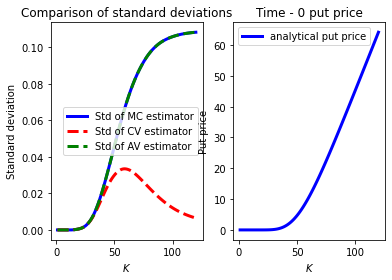

In [7]:
# Next we compare the standarddeviation of the MC, AV and the CV estimator
# Defining some model parameters
S0 = 50.0
sigma = 0.3
T = 1.0
r = 0.05
sigma = 0.3
halfsamplesize = 10000 
samplesize = 2 * halfsamplesize
myepsilon = 0.05

numberofK = 100
Ks = np.linspace(start=1, stop=120, num=numberofK)

stdMC = np.zeros(numberofK)
stdCV = np.zeros(numberofK)
stdAV = np.zeros(numberofK)
analyticalprice = np.zeros(numberofK)

# Generate the terminal stock prices
mystockprice = terminal_stockprice(rng, S0, T, r, sigma, samplesize)
myavstockprices = terminal_stockprice_av(rng, S0, T, r, sigma, halfsamplesize)
myavstockprice = myavstockprices[2]  

for i in range(numberofK):
    K = Ks[i]
    # Compute discounted payoffs
    discountedpayoffs = np.exp(- r * T) * np.maximum(K-mystockprice, 0)
    # Compute standard dev of MC estimator 
    stdMC[i] = np.std(discountedpayoffs, ddof=1) / np.sqrt(samplesize)

    # Use discounted stock as control
    xs = np.exp(- r * T) * mystockprice
    # Compute sample version of b*
    bstar = np.cov(xs, discountedpayoffs, ddof=1)[0, 1] / np.var(xs, ddof=1)
    # Define z= Y(bstar)
    z = discountedpayoffs - bstar * (xs - S0)
    # Compute standard dev of CV estimator 
    stdCV[i] = np.std(z, ddof=1) / np.sqrt(samplesize)
       
    #AV: 
    mystockprice = myavstockprice
    discountedpayoffs = np.exp(- r * T) *  np.maximum(K-mystockprice, 0)
    # Compute standard dev of AV estimator 
    stdAV[i] = np.std(discountedpayoffs, ddof=1) / np.sqrt(samplesize)
    
    # Compute the analytical put price for different strikes as well
    analyticalprice[i] = black_scholes_put(S0, K, r, T, sigma)
    

fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2)
ax1.plot(Ks, stdMC, lw=3, c="blue", label="Std of MC estimator")
ax1.plot(Ks, stdCV, lw=3, c="red", label="Std of CV estimator", linestyle = "dashed")
ax1.plot(Ks, stdAV, lw=3, c="green", label="Std of AV estimator", linestyle = "dashed")
ax1.set_ylabel("Standard deviation")
ax1.set_xlabel(r"$K$")
ax1.set_title("Comparison of standard deviations")
ax1.legend(loc = "best")

ax2.plot(Ks, analyticalprice, lw=3, c="blue", label="analytical put price")
ax2.set_ylabel("Put price")
ax2.set_xlabel(r"$K$")
ax2.set_title("Time - 0 put price")
ax2.legend(loc = "best")
plt.show()